___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (9,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [156]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
df = pd.read_csv("/content/drive/MyDrive/deep learning assignment/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [158]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [161]:
df.isnull().sum().any()


False

In [162]:
df.duplicated().sum().any()

#oooo superr...thank God!!!! as there are non-missing and duplicated values....

False

In [163]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)

# these columnns has no effect on customer leaving the bank

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Searching Exited Column ####

In [165]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [166]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

- Our dataset is imbalanced.

- Nonexited customers more than exited customers.

- Our goal should be identify exited customers accurately

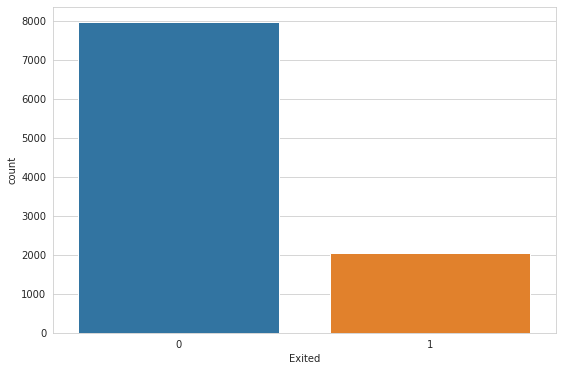

In [167]:
sns.countplot(df["Exited"]);

In [168]:
col = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
for i in col:
    print(i.upper())
    print(df[i].value_counts())
    print("---"*10)

GEOGRAPHY
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------
GENDER
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------
TENURE
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
------------------------------
NUMOFPRODUCTS
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
------------------------------
HASCRCARD
1    7055
0    2945
Name: HasCrCard, dtype: int64
------------------------------
ISACTIVEMEMBER
1    5151
0    4849
Name: IsActiveMember, dtype: int64
------------------------------


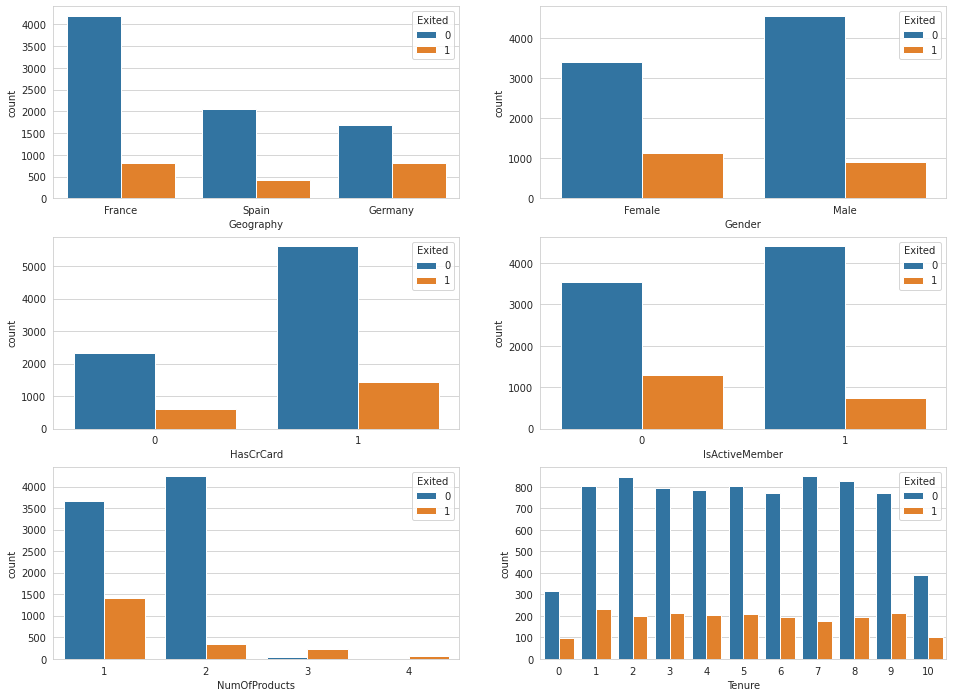

In [169]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[1][1]);
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax=ax[2][0])
sns.countplot(x='Tenure', hue = 'Exited',data = df, ax=ax[2][1]);

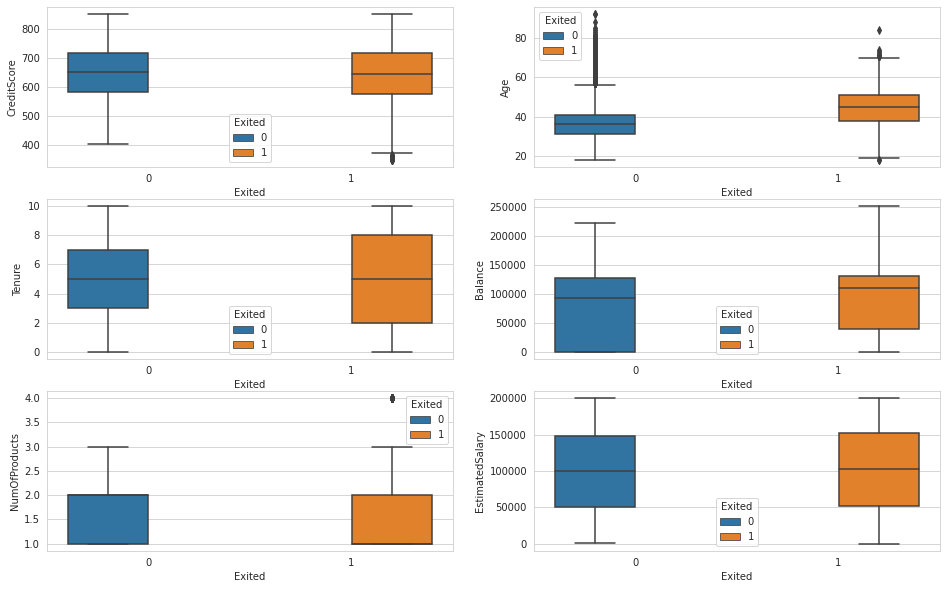

In [170]:
fig, ax = plt.subplots(3, 2, figsize=(16, 10))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=ax[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=ax[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=ax[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=ax[2][1]);

- There is no significant difference in the credit score distribution between retained and churned customers.

- The older customers are churning at more than the younger ones

- Customers with high balance scores leave the bank

- Number of products and salary amount do not have a significant effect on leaving the bank

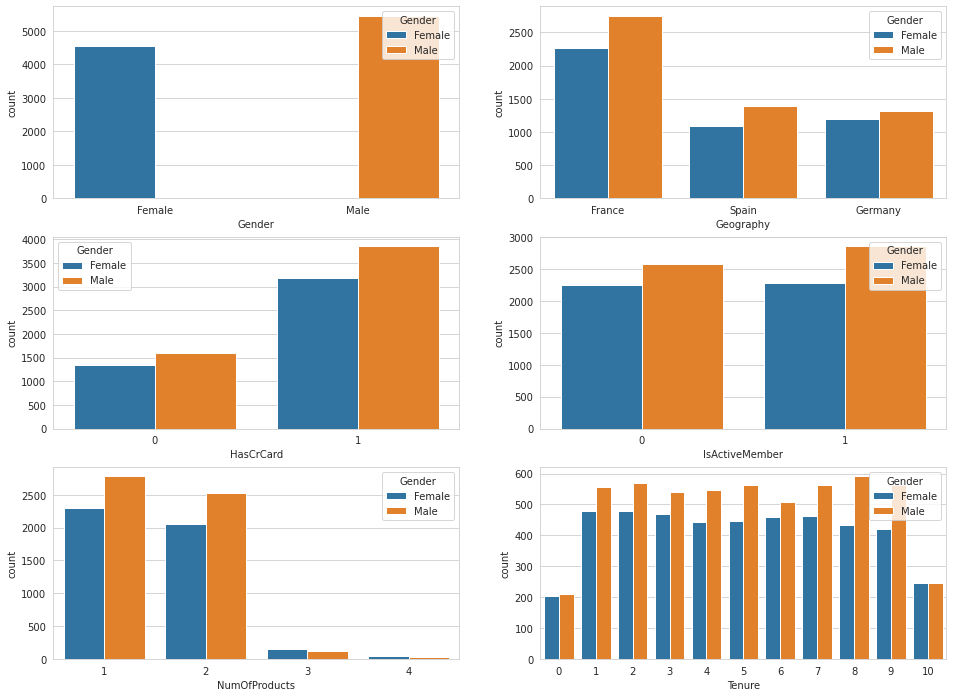

In [171]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
sns.countplot(x='Gender', hue = 'Gender',data = df, ax=ax[0][0])
sns.countplot(x='Geography', hue = 'Gender',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Gender',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Gender',data = df, ax=ax[1][1]);
sns.countplot(x='NumOfProducts', hue = 'Gender',data = df, ax=ax[2][0])
sns.countplot(x='Tenure', hue = 'Gender',data = df, ax=ax[2][1]);

- In all categories shown in the chart, the number of male customers is more than the number of female customers

In [172]:
###AGE COLUMN#####

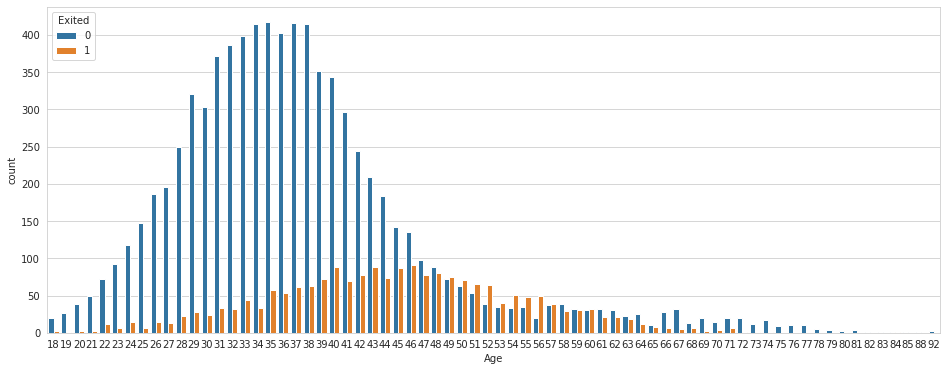

In [173]:
plt.figure(figsize = (16, 6))
sns.countplot(x="Age", hue="Exited", data=df);

The age distribution of active customers and exited customers is almost similar

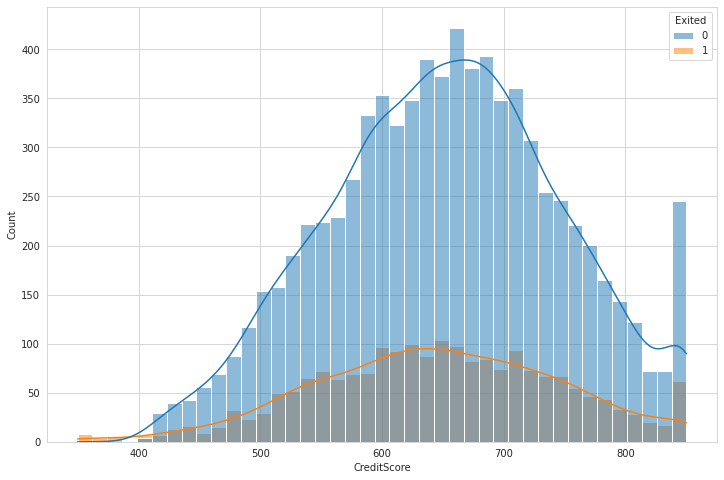

In [174]:
plt.figure(figsize = (12, 8))
sns.histplot(x="CreditScore", data=df,kde = True, hue = "Exited");

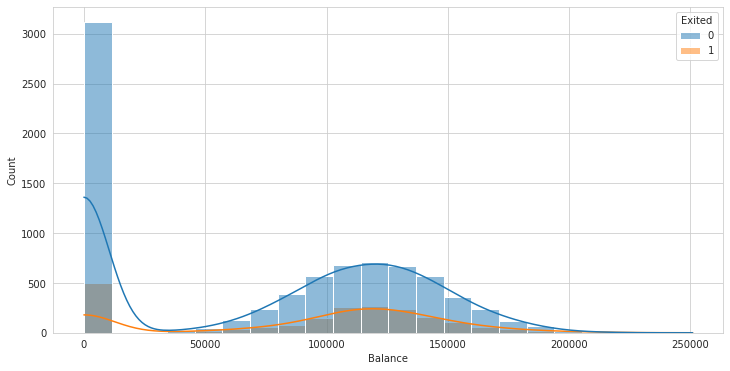

In [175]:
plt.figure(figsize = (12, 6))
sns.histplot(x="Balance", data=df, hue = "Exited", kde = True);

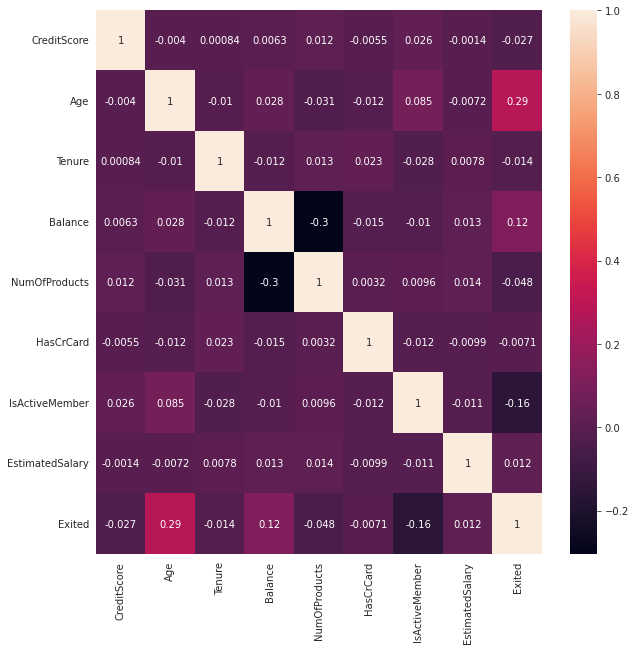

In [176]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

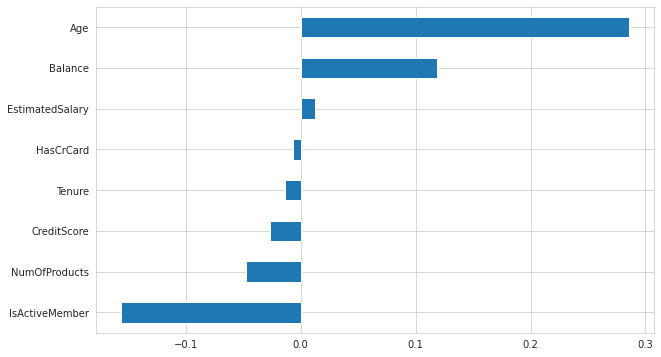

In [177]:
plt.figure(figsize = (10,6))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

# Preprocessing of Data
- Train | Test Split, Scalling

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [179]:
df = pd.get_dummies(df, drop_first=True)

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
X_train.shape

(8000, 11)

In [182]:
X_test.shape

(2000, 11)

# Modelling & Model Performance

In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import Accuracy, Recall,Precision
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from tensorflow.keras.optimizers import Adam, SGD,RMSprop
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

# **Create The Model**

## without class_weigth

Create The Model

In [217]:
model = Sequential()

model.add(Dense(44, activation = "relu"))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [218]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15, restore_best_weights=True)

In [219]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 2s 4ms/step - loss: 0.4625 - recall: 0.1455 - val_loss: 0.4073 - val_recall: 0.1579
Epoch 2/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.4114 - recall: 0.2869 - val_loss: 0.3571 - val_recall: 0.3553
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3750 - recall: 0.4127 - val_loss: 0.3473 - val_recall: 0.4737
Epoch 4/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3616 - recall: 0.4283 - val_loss: 0.3336 - val_recall: 0.5132
Epoch 5/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3600 - recall: 0.4229 - val_loss: 0.3300 - val_recall: 0.3421
Epoch 6/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3521 - recall: 0.4432 - val_loss: 0.3499 - val_recall: 0.5658
Epoch 7/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3480 - recall: 0.4405 - val_loss: 0.3256 - val_recall: 0.3421
Epoch 8/1000
225/225

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [221]:
model.history.history

{'loss': [0.46251749992370605,
  0.411359041929245,
  0.3750194311141968,
  0.3616485595703125,
  0.36004695296287537,
  0.35208725929260254,
  0.3479558527469635,
  0.34640344977378845,
  0.34873977303504944,
  0.3480764329433441,
  0.3403150141239166,
  0.34032660722732544,
  0.3403206765651703,
  0.3376161456108093,
  0.3397037982940674,
  0.34019550681114197],
 'recall': [0.1454668492078781,
  0.2868741452693939,
  0.4127199053764343,
  0.4282814562320709,
  0.4228687286376953,
  0.44316643476486206,
  0.44046008586883545,
  0.4506089389324188,
  0.44046008586883545,
  0.45466846227645874,
  0.45872801542282104,
  0.4512855112552643,
  0.45602163672447205,
  0.45196211338043213,
  0.46414074301719666,
  0.4580514132976532],
 'val_loss': [0.4072742462158203,
  0.35708537697792053,
  0.34727904200553894,
  0.3335627317428589,
  0.3300044536590576,
  0.34988293051719666,
  0.3256213068962097,
  0.3254953622817993,
  0.3164414167404175,
  0.3170315623283386,
  0.3136172592639923,
  0.3

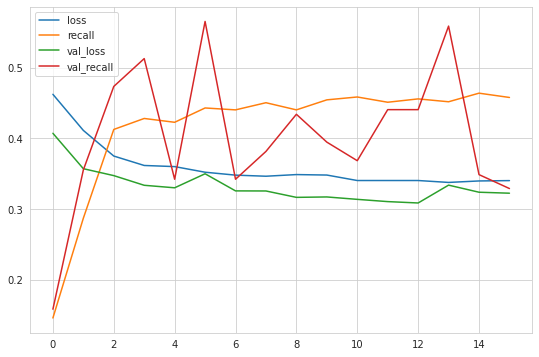

In [222]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [223]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1572   21]
 [ 349   58]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1593
           1       0.73      0.14      0.24       407

    accuracy                           0.81      2000
   macro avg       0.78      0.56      0.57      2000
weighted avg       0.80      0.81      0.76      2000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [224]:
from sklearn.utils import class_weight

In [225]:
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(y_train),  y=y_train)

In [226]:
model = Sequential()

model.add(Dense(44, activation = "relu"))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [227]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)

In [228]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1, callbacks = [early_stop])

Epoch 1/1000
225/225 [==============================] - 2s 4ms/step - loss: 0.4661 - recall: 0.0880 - val_loss: 0.4193 - val_recall: 0.1842
Epoch 2/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.4264 - recall: 0.2409 - val_loss: 0.3997 - val_recall: 0.3618
Epoch 3/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3892 - recall: 0.3146 - val_loss: 0.3385 - val_recall: 0.3816
Epoch 4/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3664 - recall: 0.3748 - val_loss: 0.3817 - val_recall: 0.5461
Epoch 5/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3634 - recall: 0.3796 - val_loss: 0.3222 - val_recall: 0.4539
Epoch 6/1000
225/225 [==============================] - 1s 2ms/step - loss: 0.3537 - recall: 0.4202 - val_loss: 0.3146 - val_recall: 0.3618
Epoch 7/1000
225/225 [==============================] - 1s 3ms/step - loss: 0.3522 - recall: 0.4127 - val_loss: 0.3224 - val_recall: 0.4934
Epoch 8/1000
225/225

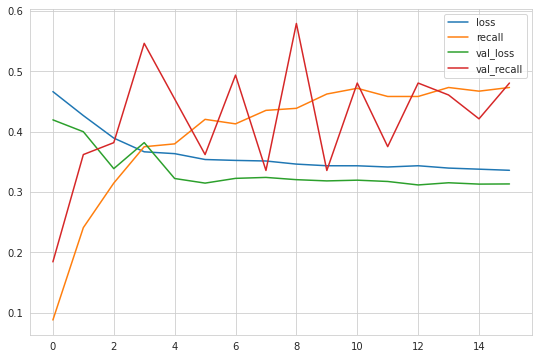

In [229]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [230]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1539   54]
 [ 216  191]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.47      0.59       407

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



### **Grid Search**

In [231]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [232]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 44, activation = 'relu'))
    classifier.add(Dense(units = 22, activation = 'relu'))
    classifier.add(Dense(units = 11, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [233]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)

In [236]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1,)
grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight = class_weights)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


ValueError: ignored

In [238]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1, class_weight = class_weights, callbacks = [early_stop])


ValueError: ignored

In [214]:
grid_model.best_score_

AttributeError: ignored

In [ ]:
grid_model.best_params_

In [ ]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

evaluate
for keras model

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

### for gridsearchcv model

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [131]:
roc_auc_score(y_test, y_pred_proba)

NameError: ignored

Final Model and Model Deployment
We use the best parameters that we found with Grid Search in the final model.

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_bank", 'wb'))

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_bank", 'wb'))

In [ ]:
model = Sequential()
model.add(Dense(44, activation = "relu"))
model.add(Dense(22, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 15)

In [132]:

Model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1, class_weight = class_weights, callbacks = [early_stop])


NameError: ignored

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_bank.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_bank = load_model('model_bank.h5')
scaler_bank = pickle.load(open("scaler_bank", "rb"))

In [ ]:
customer = df.drop('Exited', axis = 1).iloc[5:10, :]
customer

In [ ]:
customer = scaler_bank.transform(customer)
customer

In [ ]:
(model_bank.predict(customer) > 0.5).astype("int32")

In [ ]:
df["Exited"].iloc[5:10]

# ##Comparison with ML Logistic **

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(class_weight="balanced")
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight="balanced")
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___